In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# df = pd.read_csv('Cleaned_India_House_Price_Data.csv')
df = pd.read_csv('cleaned_house_data.csv')
# df =pd.read_csv('cleaned_house_price_data2.csv')
pd.set_option('display.max_columns', None)
df.head()

,City,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,Semi-Furnished,Freehold,Co-operative Society,Leasehold,Power Of Attorney,Age Less than 5 Years,Age 5 to 10 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Agra,2,2,2,1250,0.08,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,42
1,Agra,2,1,3,1500,0.25,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,49
2,Agra,2,2,2,1210,0.67,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,50
3,Agra,1,2,2,862,0.09,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,42
4,Agra,2,1,2,1212,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,42


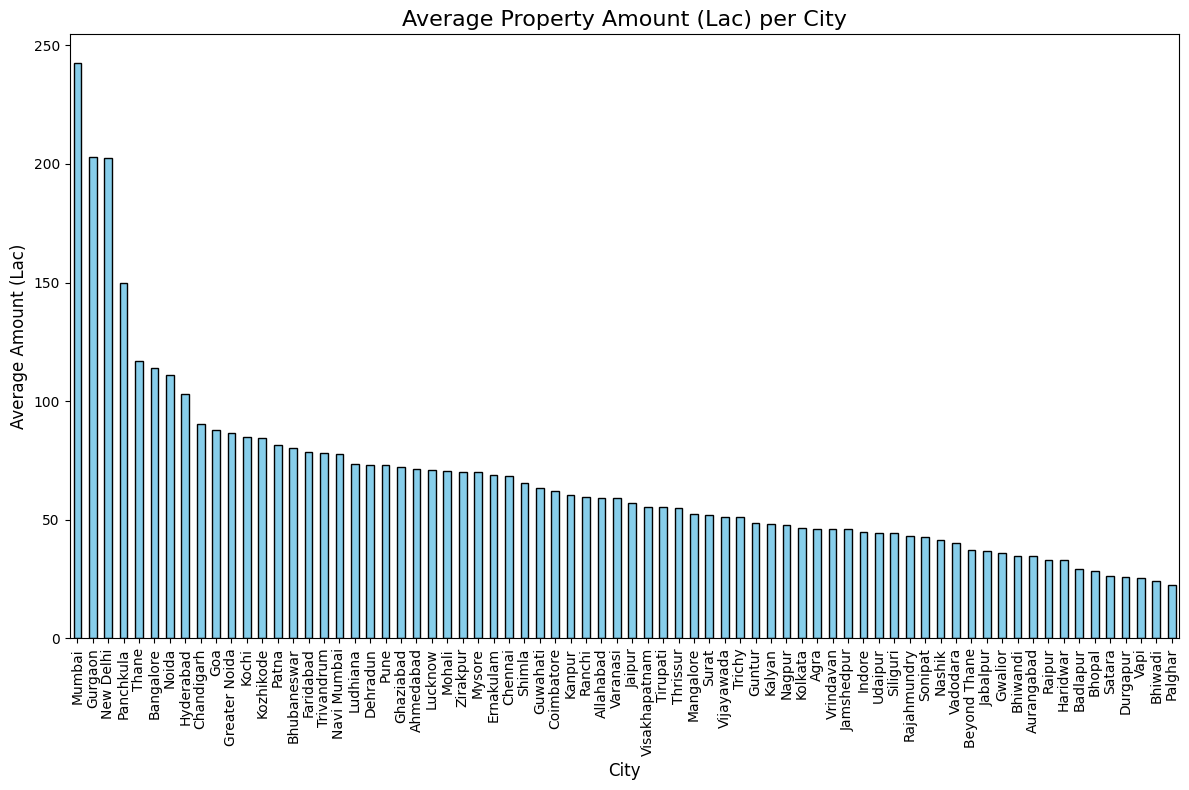

In [3]:
# Calculate average amount per city
city_avg_amount = df.groupby("City")["Amount (Lac)"].mean().sort_values(ascending=False)

# Plotting the average amount per city
plt.figure(figsize=(12, 8))
city_avg_amount.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Property Amount (Lac) per City", fontsize=16)
plt.ylabel("Average Amount (Lac)", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

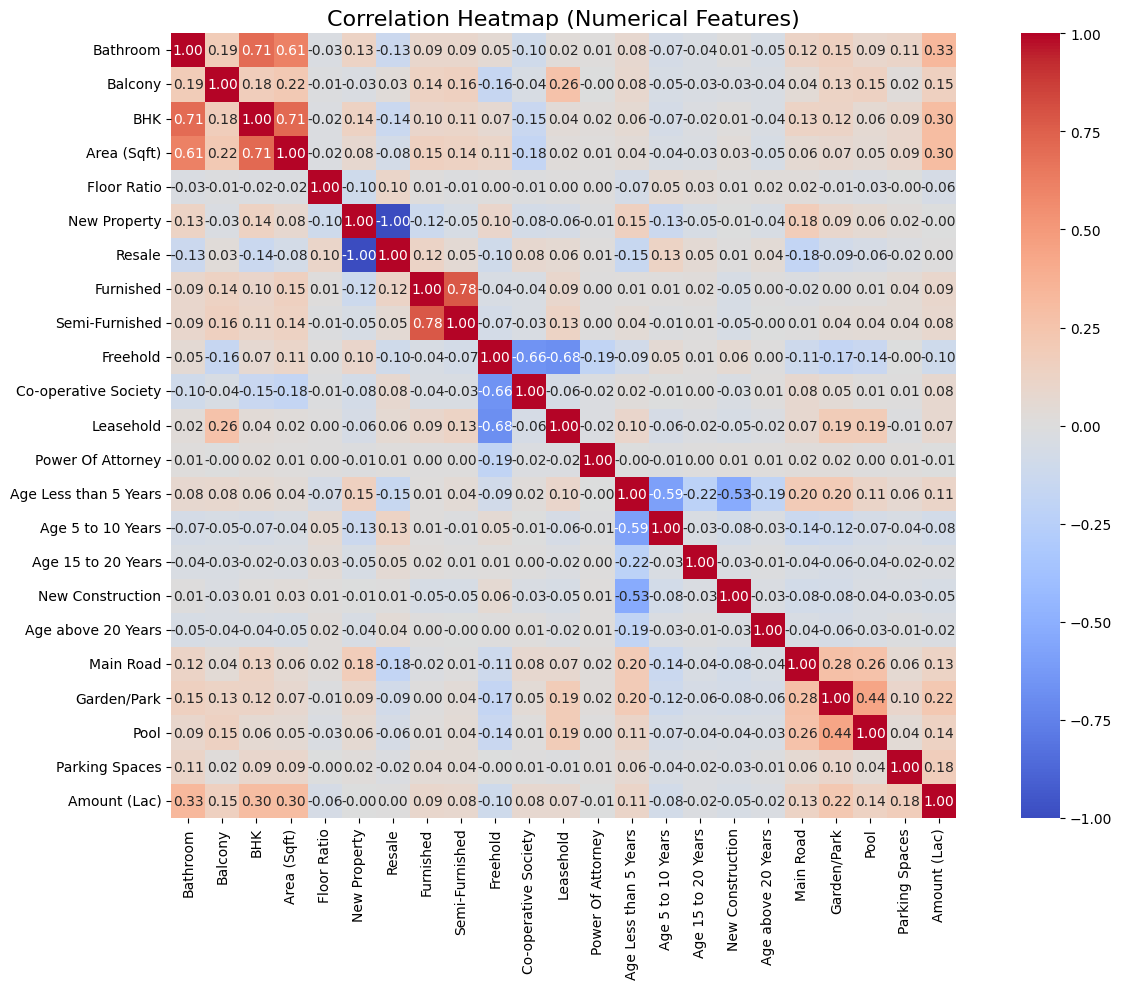

In [6]:
# Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=["float64", "int64"])

# Recalculate correlations and plot the heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
pd.set_option('Display.max_rows', None)
df.groupby('City').size()

City
Agra              117
Ahmedabad         931
Allahabad          58
Aurangabad        107
Badlapur           98
Bangalore         738
Beyond Thane      781
Bhiwadi           300
Bhiwandi           38
Bhopal            382
Bhubaneswar       272
Chandigarh        316
Chennai           948
Coimbatore        154
Dehradun          267
Durgapur           54
Ernakulam          53
Faridabad         604
Ghaziabad         804
Goa               266
Greater Noida     838
Guntur             65
Gurgaon           611
Guwahati          445
Gwalior            88
Haridwar           87
Hyderabad         747
Indore            598
Jabalpur           36
Jaipur            776
Jamshedpur        185
Kalyan            269
Kanpur            270
Kochi             233
Kolkata          1122
Kozhikode          56
Lucknow           838
Ludhiana           49
Mangalore         153
Mohali            362
Mumbai            867
Mysore             61
Nagpur            604
Nashik            329
Navi Mumbai      1319
New D

In [16]:
df['City'] = df['City'].astype(str)




In [17]:
dummies = pd.get_dummies(df.City).astype(int)
dummies.head()

,Agra,Ahmedabad,Allahabad,Aurangabad,Badlapur,Bangalore,Beyond Thane,Bhiwadi,Bhiwandi,Bhopal,Bhubaneswar,Chandigarh,Chennai,Coimbatore,Dehradun,Durgapur,Ernakulam,Faridabad,Ghaziabad,Goa,Greater Noida,Guntur,Gurgaon,Guwahati,Gwalior,Haridwar,Hyderabad,Indore,Jabalpur,Jaipur,Jamshedpur,Kalyan,Kanpur,Kochi,Kolkata,Kozhikode,Lucknow,Ludhiana,Mangalore,Mohali,Mumbai,Mysore,Nagpur,Nashik,Navi Mumbai,New Delhi,Noida,Palghar,Panchkula,Patna,Pune,Raipur,Rajahmundry,Ranchi,Satara,Shimla,Siliguri,Sonipat,Surat,Thane,Thrissur,Tirupati,Trichy,Trivandrum,Udaipur,Vadodara,Vapi,Varanasi,Vijayawada,Visakhapatnam,Vrindavan,Zirakpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
new_df = pd.concat([df, dummies], axis = 'columns')
new_df.head()

,City,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,Semi-Furnished,Freehold,Co-operative Society,Leasehold,Power Of Attorney,Age Less than 5 Years,Age 5 to 10 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac),Agra,Ahmedabad,Allahabad,Aurangabad,Badlapur,Bangalore,Beyond Thane,Bhiwadi,Bhiwandi,Bhopal,Bhubaneswar,Chandigarh,Chennai,Coimbatore,Dehradun,Durgapur,Ernakulam,Faridabad,Ghaziabad,Goa,Greater Noida,Guntur,Gurgaon,Guwahati,Gwalior,Haridwar,Hyderabad,Indore,Jabalpur,Jaipur,Jamshedpur,Kalyan,Kanpur,Kochi,Kolkata,Kozhikode,Lucknow,Ludhiana,Mangalore,Mohali,Mumbai,Mysore,Nagpur,Nashik,Navi Mumbai,New Delhi,Noida,Palghar,Panchkula,Patna,Pune,Raipur,Rajahmundry,Ranchi,Satara,Shimla,Siliguri,Sonipat,Surat,Thane,Thrissur,Tirupati,Trichy,Trivandrum,Udaipur,Vadodara,Vapi,Varanasi,Vijayawada,Visakhapatnam,Vrindavan,Zirakpur
0,Agra,2,2,2,1250,0.08,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agra,2,1,3,1500,0.25,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agra,2,2,2,1210,0.67,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agra,1,2,2,862,0.09,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agra,2,1,2,1212,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:

new_df = new_df.drop(columns= ['City'], axis = 1)
new_df.head()

,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,Semi-Furnished,Freehold,Co-operative Society,Leasehold,Power Of Attorney,Age Less than 5 Years,Age 5 to 10 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac),Agra,Ahmedabad,Allahabad,Aurangabad,Badlapur,Bangalore,Beyond Thane,Bhiwadi,Bhiwandi,Bhopal,Bhubaneswar,Chandigarh,Chennai,Coimbatore,Dehradun,Durgapur,Ernakulam,Faridabad,Ghaziabad,Goa,Greater Noida,Guntur,Gurgaon,Guwahati,Gwalior,Haridwar,Hyderabad,Indore,Jabalpur,Jaipur,Jamshedpur,Kalyan,Kanpur,Kochi,Kolkata,Kozhikode,Lucknow,Ludhiana,Mangalore,Mohali,Mumbai,Mysore,Nagpur,Nashik,Navi Mumbai,New Delhi,Noida,Palghar,Panchkula,Patna,Pune,Raipur,Rajahmundry,Ranchi,Satara,Shimla,Siliguri,Sonipat,Surat,Thane,Thrissur,Tirupati,Trichy,Trivandrum,Udaipur,Vadodara,Vapi,Varanasi,Vijayawada,Visakhapatnam,Vrindavan,Zirakpur
0,2,2,2,1250,0.08,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,3,1500,0.25,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,2,1210,0.67,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,2,862,0.09,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1212,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
new_df.shape

(26385, 95)

In [21]:
X = new_df.drop(columns=['Amount (Lac)'], axis= 1)
y = new_df['Amount (Lac)']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Linear Regression:
R-squared: 0.89
Mean Absolute Error (MAE): 11.33
Root Mean Squared Error (RMSE): 17.18
Accuracy of Model: 0.89
****************************************


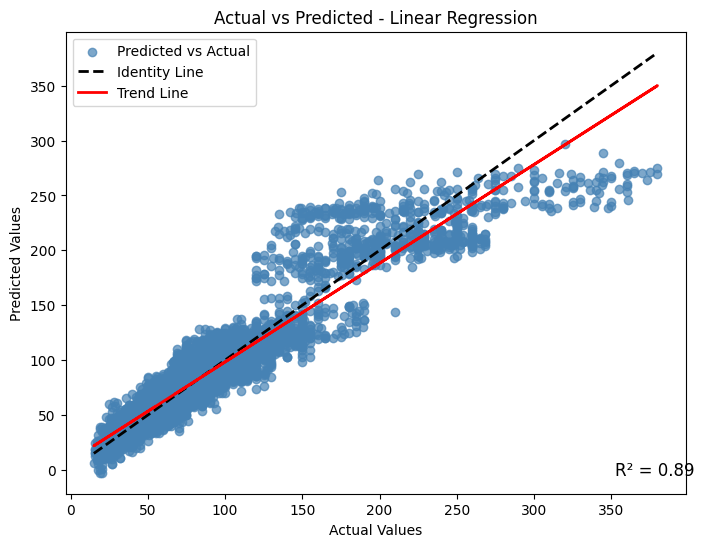

                  Feature   Coefficient  Absolute_Coefficient
12      Power Of Attorney -5.902945e+10          5.902945e+10
9                Freehold -5.902945e+10          5.902945e+10
10   Co-operative Society -5.902945e+10          5.902945e+10
11              Leasehold -5.902945e+10          5.902945e+10
6                  Resale -3.313656e+10          3.313656e+10
5            New Property -3.313656e+10          3.313656e+10
2                     BHK  1.034466e+01          1.034466e+01
21         Parking Spaces  7.906174e+00          7.906174e+00
0                Bathroom  4.026469e+00          4.026469e+00
19            Garden/Park  3.180497e+00          3.180497e+00
15     Age 15 to 20 Years -2.884196e+00          2.884196e+00
7               Furnished  2.239041e+00          2.239041e+00
18              Main Road  2.086244e+00          2.086244e+00
8          Semi-Furnished -1.852590e+00          1.852590e+00
4             Floor Ratio -1.396810e+00          1.396810e+00
17     A

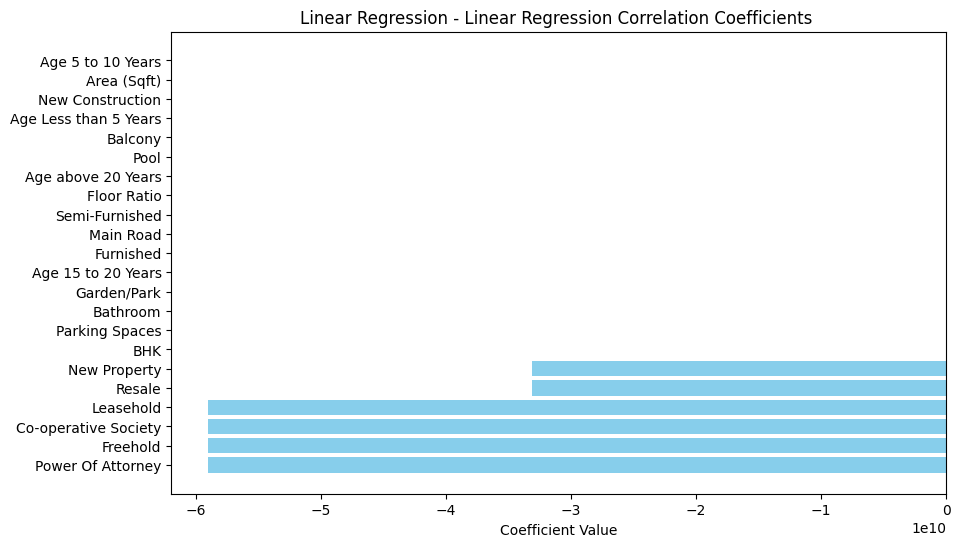

Decision Tree Regressor:
R-squared: 0.85
Mean Absolute Error (MAE): 15.04
Root Mean Squared Error (RMSE): 20.11
Accuracy of Model: 0.85
****************************************


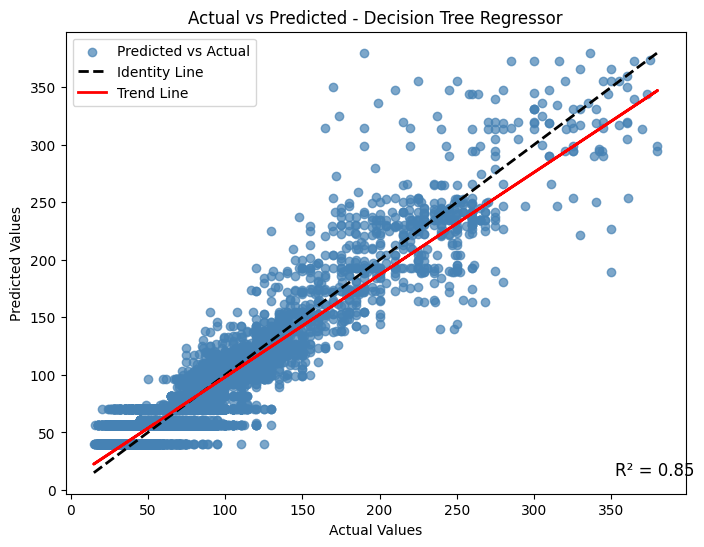

Feature Importances for Decision Tree Regressor:
                  Feature  Importance
3             Area (Sqft)    0.131138
2                     BHK    0.009720
0                Bathroom    0.005720
4             Floor Ratio    0.005410
1                 Balcony    0.002359
13  Age Less than 5 Years    0.001133
18              Main Road    0.001010
8          Semi-Furnished    0.000902
19            Garden/Park    0.000869
20                   Pool    0.000862
7               Furnished    0.000754
6                  Resale    0.000619
9                Freehold    0.000618
21         Parking Spaces    0.000517
5            New Property    0.000338
12      Power Of Attorney    0.000244
15     Age 15 to 20 Years    0.000232
11              Leasehold    0.000175
14      Age 5 to 10 Years    0.000087
10   Co-operative Society    0.000057
16       New Construction    0.000020
17     Age above 20 Years    0.000000


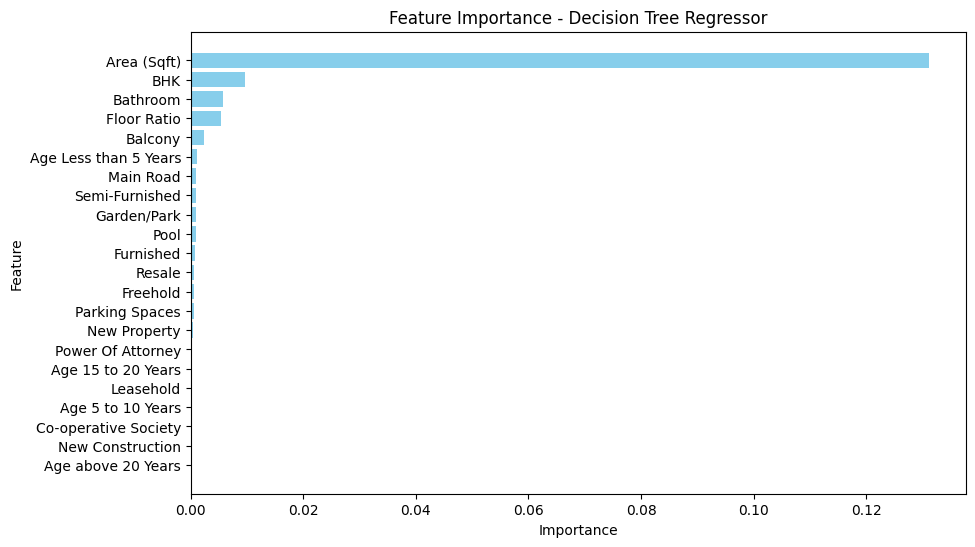

Random Forest:
R-squared: 0.91
Mean Absolute Error (MAE): 11.83
Root Mean Squared Error (RMSE): 16.06
Accuracy of Model: 0.91
****************************************


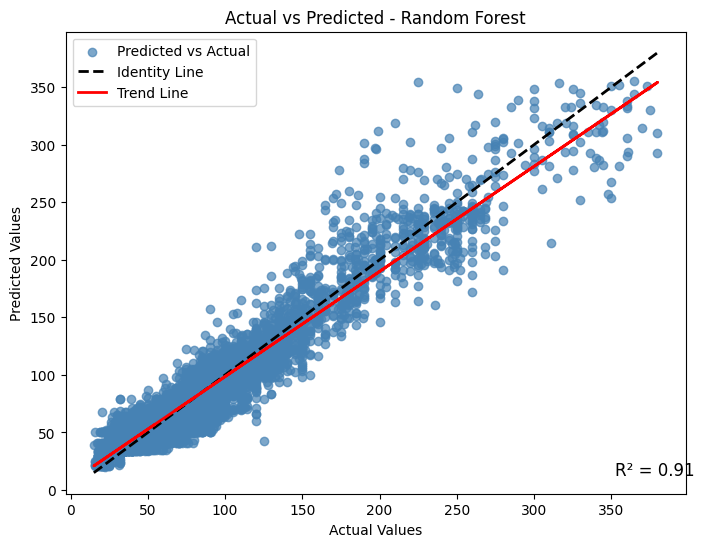

Feature Importances for Random Forest:
                  Feature  Importance
3             Area (Sqft)    0.134038
2                     BHK    0.014233
4             Floor Ratio    0.010950
0                Bathroom    0.006760
1                 Balcony    0.003553
18              Main Road    0.002238
19            Garden/Park    0.002044
8          Semi-Furnished    0.001553
7               Furnished    0.001332
20                   Pool    0.001247
13  Age Less than 5 Years    0.001038
21         Parking Spaces    0.001026
5            New Property    0.000838
6                  Resale    0.000778
9                Freehold    0.000743
10   Co-operative Society    0.000532
14      Age 5 to 10 Years    0.000432
15     Age 15 to 20 Years    0.000427
11              Leasehold    0.000345
16       New Construction    0.000278
12      Power Of Attorney    0.000211
17     Age above 20 Years    0.000085


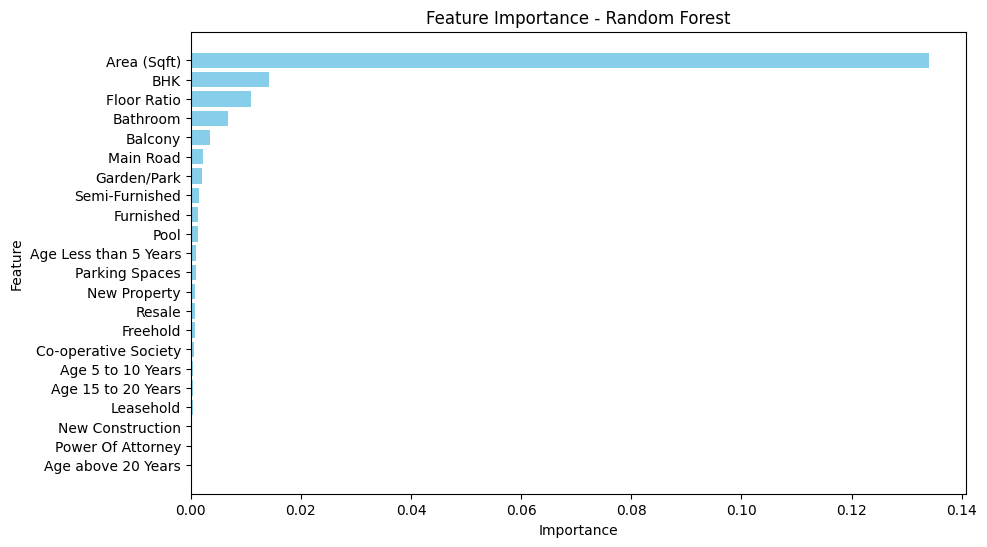

Knr:
R-squared: 0.40
Mean Absolute Error (MAE): 25.48
Root Mean Squared Error (RMSE): 40.83
Accuracy of Model: 0.40
****************************************


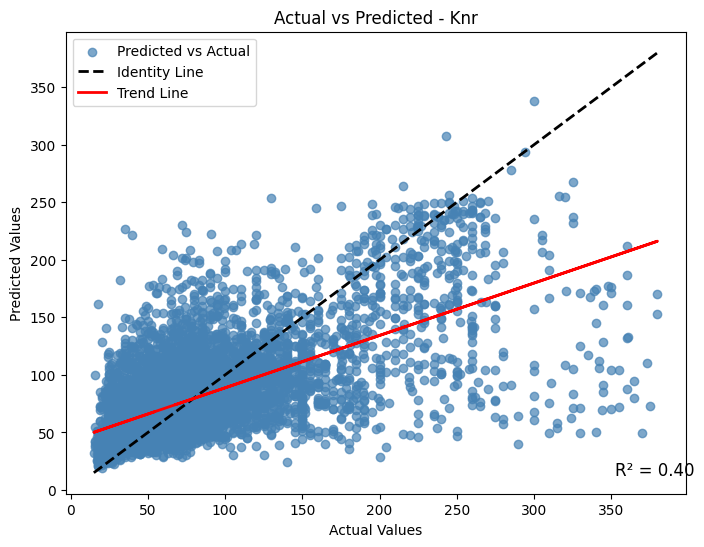

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    'Knr': KNeighborsRegressor(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    scoree = model.score(X_test, y_test)

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Accuracy of Model: {scoree:.2f}')
    print('****************************************')

    # Visualization of Actual vs Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='steelblue', alpha=0.7, label='Predicted vs Actual')

    # Fit a linear regression model for the trend line (best fit line)
    lin_reg = LinearRegression()
    lin_reg.fit(np.array(y_test).reshape(-1, 1), np.array(y_pred).reshape(-1, 1))  # Reshaped to numpy arrays
    trend_line = lin_reg.predict(np.array(y_test).reshape(-1, 1))

    # Plot the identity line (perfect prediction line)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle = "--",   linewidth=2, label='Identity Line')

    # Plot the trend line (best fit line)
    plt.plot(y_test, trend_line, color='red', linewidth=2, label='Trend Line')

    # Display R-squared at the bottom right of the plot
    plt.text(0.95, 0.05, f'R² = {r2:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

    # Customize plot
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()


    # Extracting coefficients for Linear Regression
    if isinstance(model, LinearRegression):
        coefficients = model.coef_[:22]  # Only take the first 22 coefficients

        # Creating a DataFrame for better visualization
        coefficients_df = pd.DataFrame({'Feature': X_train.columns[:22], 'Coefficient': coefficients})

        # Sorting the DataFrame by absolute coefficient values for better visualization
        coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
        coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
        print(coefficients_df)
        # Plotting the coefficients
        plt.figure(figsize=(10, 6))
        plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
        plt.xlabel('Coefficient Value')
        plt.title(f'{model_name} - Linear Regression Correlation Coefficients ')
        plt.show()


    # Feature Importance for tree-based models
    elif hasattr(model, 'feature_importances_'):  # Check if the model has feature_importances_
        importance = model.feature_importances_
        # Get the first 23 columns
        importance_df = pd.DataFrame({
            'Feature': X_train.columns[:22],  # Select only the first 23 columns excluding the cities
            'Importance': importance[:22]  # Match importance values to these columns
        }).sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {model_name}:")
        print(importance_df)
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
        plt.show()





 